<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

O COVID-19 é uma enfermidade contagiosa originada pelo recentemente descoberto coronavírus. Sua transmissão ocorre principalmente através de gotículas expelidas por tosse ou espirros de indivíduos infectados, e a severidade dos sintomas varia consideravelmente de pessoa para pessoa.

É notório que ainda há muita incerteza em relação ao COVID-19. Embora pesquisas estejam em andamento em todo o mundo, os resultados ainda não oferecem conclusões definitivas.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o momento presente, aproximadamente 80% dos casos confirmados são assintomáticos e de evolução rápida, com a maioria das pessoas nesse grupo se recuperando sem sequelas. Entretanto, cerca de 15% dos pacientes enfrentarão infecções graves que requerem oxigênio, enquanto os 5% restantes serão categorizados como casos muito graves, necessitando de ventilação assistida por meio de respiradores mecânicos em ambiente hospitalar.

Com o propósito de aumentar a conscientização sobre o COVID-19 no Brasil, vou analisar os dados públicos relacionados à doença.

## Obtenção dos Dados

Para este projeto, utilizei dados oficiais da Organização Mundial de Saúde.

A análise dos dados da COVID-19 enfrenta desafios devido à disparidade e inconsistência entre as informações fornecidas pelos governos federal e estaduais, bem como os dados não oficiais provenientes de diferentes fontes. Esses conflitos podem gerar dificuldades na compreensão precisa da situação da pandemia, afetando as estratégias de resposta e prevenção. A falta de padronização e transparência nos relatórios dificulta uma avaliação abrangente e confiável da disseminação e impacto da doença.


In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


## Análise Exploratória dos Dados

Apesar desta análise ser focada no Brasil, é importante ter uma ideia do quadro mundial do vírus para ter uma visão geral.



Vamos visualizar as 5 primeiras entradas do nosso dataset:

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Vamos descobrir o tamanho do dataframe:

In [4]:
df.shape

(380273, 67)

Agora, o nome das colunas:

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Em qualquer análise, é importante compreender os tipos das variáveis disponíveis no banco de dados.

In [6]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Agora, vamos identificar a porcentagem de valores ausentes nas colunas:

In [7]:
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

weekly_icu_admissions_per_million          97.210951
weekly_icu_admissions                      97.210951
excess_mortality_cumulative_per_million    96.551688
excess_mortality                           96.551688
excess_mortality_cumulative                96.551688
                                             ...    
new_deaths_per_million                      2.830072
population                                  0.000000
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

Podemos perceber que alguns parâmetros da Organização Mundial de Saúde estão praticamente ausentes. Portanto, não vou utilizá-los em nossa análise.

Vou transformar a coluna *date* no formato *datetime* para analisar os dados a partir de uma data específica.

In [8]:
df.date = pd.to_datetime(df.date)

A última atualização no banco de dados da OMS foi no dia 4 de fevereiro de 2024, então checarei o total de casos e mortes até essa data.

In [9]:
print("Total de casos =", df.loc[df.date == '2024-02-04'].total_cases.max())

Total de casos = 774549276.0


In [10]:
print("Total de mortes =", df.loc[df.date == '2024-02-04'].total_deaths.max())

Total de mortes = 7030145.0


In [11]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

Percebi que, dentro da coluna locations, além de países, também continha continentes e algumas classificações sociais.
Portanto, vou limpar esta coluna antes de realizar uma análise por países.

In [12]:
df = df.drop(index=df[df['location'].isin(['Europe', 'High income','Low income','Lower middle income','Upper middle income','North America','Asia','South America', 'Africa', 'Oceania','European Union'])].index)

Agora, com os dados devidamente tratados, vou plotar um grafico para mostrar os 5 paises com mais mortes confirmadas.

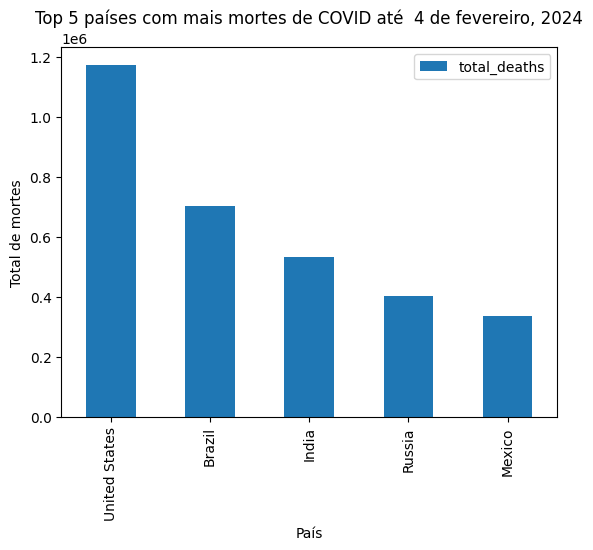

In [13]:
df_feb4 = df.loc[df.date == '2024-02-04', ['location', 'total_deaths']]

df_top5 = df_feb4.sort_values(by="total_deaths", ascending=False)[1:6]

df_top5.plot.bar(x='location', y='total_deaths')
plt.title('Top 5 países com mais mortes de COVID até  4 de fevereiro, 2024')
plt.xlabel('País')
plt.ylabel('Total de mortes')
plt.show()

Acompanhar o aumento de casos e mortes em todo o mundo é uma das principais preocupações das organizações de saúde.

Uma maneira eficaz de visualizar essa evolução ao longo do tempo é usando um gráfico de linhas. Portanto, vamos plotar um gráfico de linhas para mostrar o aumento de mortes no mundo.

Text(0.5, 1.0, 'Evolução nos casos da COVID-19 no mundo')

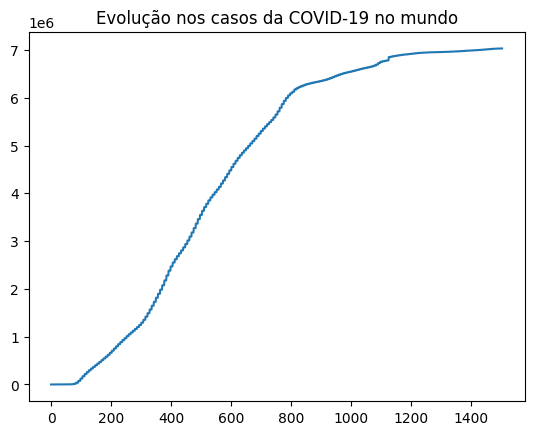

In [14]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
plt.title('Evolução nos casos da COVID-19 no mundo')

Como podemos observar, atualmente existe uma tendência de equilíbrio na ocorrência de novos casos.

### Análise Exploratória para o Brasil
Agora que já temos uma noção dos acontecimentos no mundo, vamos focar  no Brasil.


In [15]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45205,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45206,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45207,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45208,BRA,South America,Brazil,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45209,BRA,South America,Brazil,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Vamos verificar quando houve o primeiro caso e a primeira morte no Brasil.

In [24]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45282,BRA,South America,Brazil,2020-03-22,904.0,820.0,117.143,11.0,11.0,1.571,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Segundo o database, a primeira morte ocorreu no dia 22 de março de 2020.

Agora, vamos descobrir quando aconteceu o primeiro caso da doença

In [25]:
# Identificar quando foi registrada o primeiro caso no Brasil
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45261,BRA,South America,Brazil,2020-03-01,1.0,1.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


O primeiro caso aconteceu dia 1 de março, ou seja, a primeira morte ocorreu 21 dias após este registro.

Vou plotar dois gráficos para entendermos a relação entre casos totais e mortes totais.

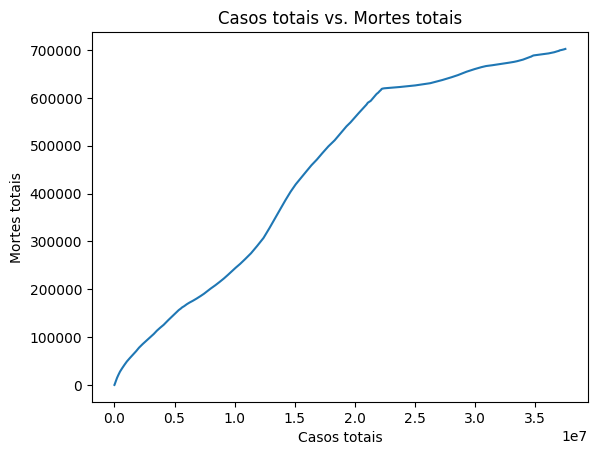

In [33]:
plt.plot(df_brasil['total_cases'], df_brasil['total_deaths'])

plt.title('Casos totais vs. Mortes totais')
plt.xlabel('Casos totais')
plt.ylabel('Mortes totais')

plt.show()

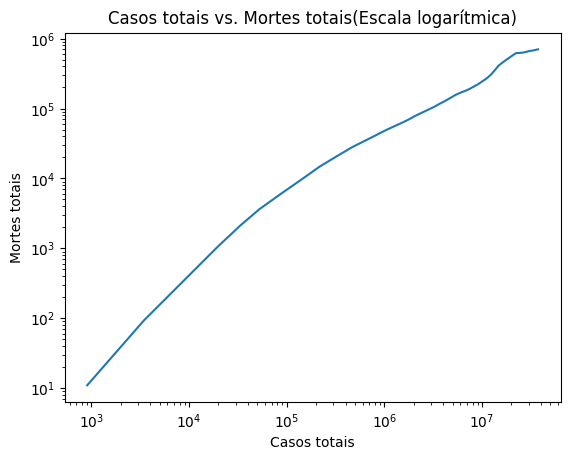

In [34]:
plt.plot(df_brasil['total_cases'], df_brasil['total_deaths'])

plt.title('Casos totais vs. Mortes totais(Escala logarítmica)')
plt.xlabel('Casos totais')
plt.ylabel('Mortes totais')

plt.xscale('log')
plt.yscale('log')

plt.show()

## Conclusão

Apesar da estabilização dos casos de COVID-19 desde 2023, o vírus ainda está em circulação, demandando atenção cautelosa.

No contexto brasileiro, evidenciou-se o impacto positivo da vacinação. A partir de aproximadamente 20 milhões de casos registrados, correspondentes ao período das campanhas de imunização, observou-se no gráfico de linha uma significativa desaceleração no aumento das mortes, em contraste com o padrão anterior praticamente exponencial.

Infelizmente, este banco de dados está parando de receber atualizações, dificultando uma pesquisa mais atual, porém foi possível realizar algumas análises, mesmo que superficiais, do quadro da COVID-19.